<a href="https://colab.research.google.com/github/poornass/Machine-learning-lab/blob/main/Feed_Forward_NN_based_Multi_Class_iris_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris data Classification using Feed Forward NN**
 




---



#**Outline**

1. Load data.
2. Define model for multi-class classification.
3. Compile model.
4. Fit model.
5. Evaluate model.
6. Save the model

# Loading dataset

Load iris dataset from the python package sklearn.

In [1]:
import sklearn.datasets
import numpy as np


In [2]:
iris = sklearn.datasets.load_iris()

#Data analysis

In [3]:
import pandas as pd

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.shape

(150, 4)

Target attribute holds the labels (0,1,2), which is added to our dataframe as a new column 'class'.

In [5]:
data['class'] = iris.target
print(data['class'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Class 2 - setosa,  class 1 - versicolor, class 0 - virginica

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


# Train test split

In [8]:
from sklearn.model_selection import train_test_split

X- features and Y-labels

In [10]:
X = data.drop('class', axis=1) # 1 for column, 0 for row
Y = data['class']

In [12]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (135, 4) (15, 4)


In [19]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

1.0 1.0 1.0


Stratify on Y (labels) ensures the distribution of class 0, class 1 and class 2 data is equal in train and test test. Also, random_state is set to reproduce the results.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

For further computations on the data we need it in numpy format. 'values' attribute of the Dataframe returns numpy arrays.



In [21]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

#Feed Forward Network in Keras

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt


A simple sequential model is created with two hidden layers. Since it is a 3-class classification problem, the output layer has 3 neurons with a softmax activation.

In [23]:
# create model
model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'random_uniform', activation='relu',  input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'random_uniform', activation='relu'))
model.add(Dense(units = 3, kernel_initializer = 'random_uniform', activation = 'softmax'))

In [24]:
!pip install ann_visualizer
!pip install graphviz
from ann_visualizer.visualize import ann_viz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=4fec16c7207d566d9b12399d41ea64ddfd07b2dce03f5b3eae8ba001b6bfe343
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
ann_viz(model, filename="network.gv",title="My neural  network")

In [31]:
# Compile model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

categorical_crossentropy or sparse_categorical_crossentropy is used as the loss for multi-class classification. If the former is used then Y_train should be in one-hot encoded form and for the latter, Y_train should be integers.

In [33]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

One-hot encoded form:



[1,0,0] --------> Class  0

[0,1,0]---------> Class 1

[0,0,1]---------> Class 2

In [34]:
print(Y_train)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

In [35]:
# Fit the model
history =model.fit(X_train, Y_train, batch_size =32, epochs = 10,validation_split=0.20, verbose=1)

Epoch 1/10
4/4 [==============================] - 2s 79ms/step - loss: 1.0986 - accuracy: 0.3148 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 1.0983 - accuracy: 0.3333 - val_loss: 1.0982 - val_accuracy: 0.3333
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 1.0982 - accuracy: 0.3333 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 1.0979 - accuracy: 0.3333 - val_loss: 1.0976 - val_accuracy: 0.3333
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 1.0976 - accuracy: 0.3333 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 1.0971 - accuracy: 0.4907 - val_loss: 1.0966 - val_accuracy: 0.7037
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 1.0965 - accuracy: 0.6574 - val_loss: 1.0958 - val_accuracy: 0.7037
Epoch 8/10
4/4 [===========

In [36]:
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 24ms/step - loss: 1.0925 - accuracy: 0.6667

accuracy: 66.67%


The filt() returns History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [39]:
history.history

{'accuracy': [0.31481480598449707,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.49074074625968933,
  0.6574074029922485,
  0.6574074029922485,
  0.6574074029922485,
  0.6574074029922485],
 'loss': [1.0985764265060425,
  1.098339557647705,
  1.0981770753860474,
  1.097890019416809,
  1.0975723266601562,
  1.0971499681472778,
  1.0965158939361572,
  1.0957980155944824,
  1.0947448015213013,
  1.0933854579925537],
 'val_accuracy': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.7037037014961243,
  0.7037037014961243,
  0.7037037014961243,
  0.7037037014961243,
  0.7037037014961243],
 'val_loss': [1.0983809232711792,
  1.0981874465942383,
  1.0979071855545044,
  1.0976290702819824,
  1.097229242324829,
  1.0966169834136963,
  1.0958083868026733,
  1.0946717262268066,
  1.09328293800354,
  1.0914583206176758]}

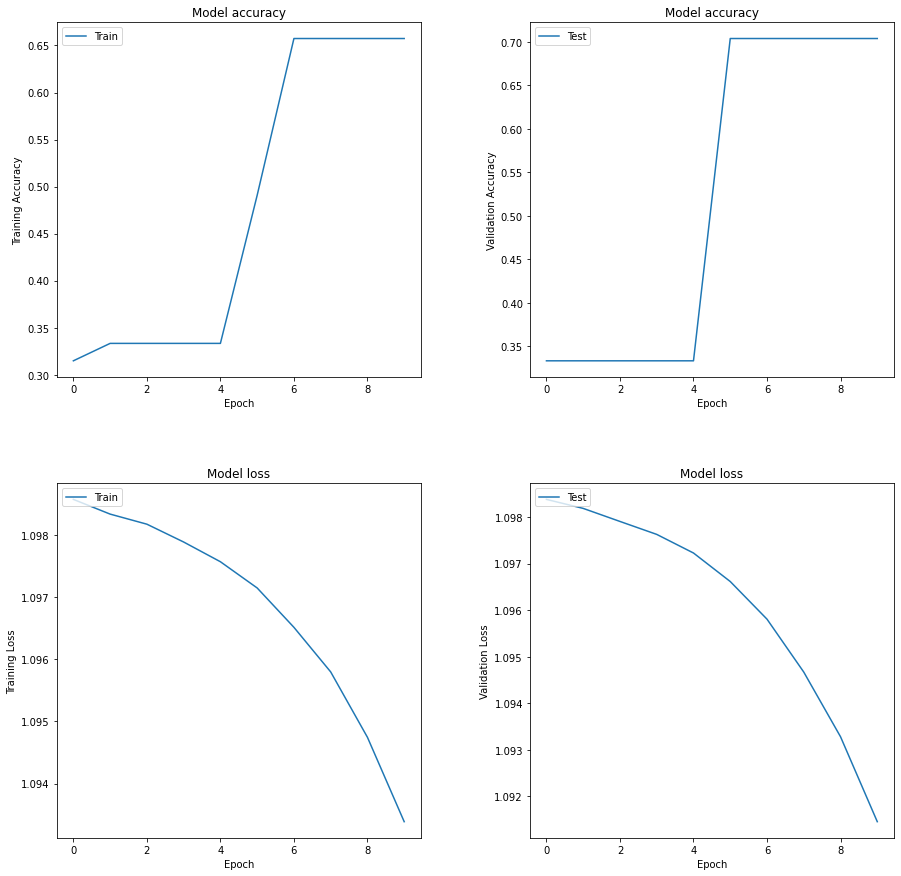

In [40]:
f, axs = plt.subplots(2,2,figsize=(15,15))
# Plot training & validation accuracy values
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')


plt.subplot(2, 2, 2)
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')


plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend([ 'Test'], loc='upper left')
plt.subplots_adjust(hspace = .3 ,wspace =.3)
plt.show()

In [41]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model.save_weights("model_weights.h5")

In [42]:
from keras.models import load_model
model_saved = load_model('my_model.h5')

In [43]:
# evaluate the model
scores = model_saved.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model_saved.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 155ms/step - loss: 1.0925 - accuracy: 0.6667

accuracy: 66.67%


Generates output predictions for the input samples.

In [46]:
predictions = model.predict(X_test)

In [47]:
predictions

array([[0.33095157, 0.3333576 , 0.3356908 ],
       [0.33385113, 0.33254513, 0.3336038 ],
       [0.33086866, 0.33333695, 0.33579436],
       [0.33818448, 0.3313048 , 0.33051074],
       [0.3321509 , 0.3330441 , 0.33480492],
       [0.33718058, 0.3315959 , 0.33122355],
       [0.33741477, 0.33151376, 0.33107147],
       [0.33086875, 0.3333369 , 0.3357943 ],
       [0.33218527, 0.33304238, 0.33477238],
       [0.33089703, 0.3333406 , 0.33576232],
       [0.33762902, 0.33147067, 0.3309003 ],
       [0.33299652, 0.33280173, 0.33420175],
       [0.33325207, 0.33273184, 0.33401608],
       [0.33091453, 0.33334842, 0.33573702],
       [0.337631  , 0.3314671 , 0.33090192]], dtype=float32)

In [51]:
predictions=np.argmax(model.predict(X_test), axis=-1)

In [52]:
predictions

array([2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0])